
Steps we’ve covered so far:
- Camera calibration
- Distortion correction
- Color/gradient threshold
- Perspective transform

After doing these steps, you’ll be given two additional steps for the project:

- Detect lane lines
- Determine the lane curvature


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

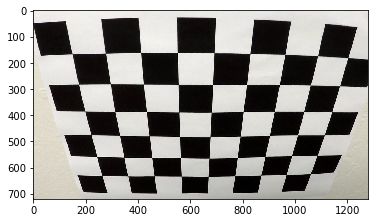

In [3]:
img_name = "./camera_cal/calibration2.jpg"
test_img = mpimg.imread(img_name)
plt.imshow(test_img)

## calibrating the camera

there is an issue with image ./camera_cal\calibration1.jpg, right number of corners cannot be found
appending points for image ./camera_cal\calibration10.jpg...
appending points for image ./camera_cal\calibration11.jpg...
appending points for image ./camera_cal\calibration12.jpg...
appending points for image ./camera_cal\calibration13.jpg...
appending points for image ./camera_cal\calibration14.jpg...
appending points for image ./camera_cal\calibration15.jpg...
appending points for image ./camera_cal\calibration16.jpg...
appending points for image ./camera_cal\calibration17.jpg...
appending points for image ./camera_cal\calibration18.jpg...
appending points for image ./camera_cal\calibration19.jpg...
appending points for image ./camera_cal\calibration2.jpg...
appending points for image ./camera_cal\calibration20.jpg...
appending points for image ./camera_cal\calibration3.jpg...
there is an issue with image ./camera_cal\calibration4.jpg, right number of corners cannot be found
there is 

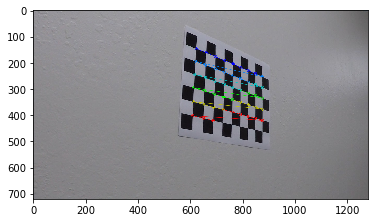

In [4]:
images = glob.glob("./camera_cal/calibration*.jpg")

# array ti store object and images points
# top left (0,0,0), bottom right (7,5,0)

objpoints = [] # 3d points in real world
imgpoints = [] # 2D points in image plane

# prepare oiunts, like (0,0,0), (1,0,0), (2,0,0), ... (7,5,0)
n_x = 9
n_y = 6
objp = np.zeros((n_x*n_y,3), np.float32)
objp[:,:2] = np.mgrid[0:n_x, 0:n_y].T.reshape(-1, 2) # x, y coordinates

for img_name in images:
    # Load image
    img = mpimg.imread(img_name)
    
    # Convert to grayscale image
    grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find chessboard corners
    ret, corners = cv2.findChessboardCorners(grayscale_image, (n_x, n_y), None)

    # if corners are found, add object points, image points
    if ret is True:
        print("appending points for image {}...".format(img_name))
        imgpoints.append(corners)
        objpoints.append(objp) # everytime the same, cause it the "real" chessboard

        # draw n display
        img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        plt.imshow(img)
    else:
        print("there is an issue with image {}, right number of corners cannot be found".format(img_name))

In [5]:
# objpoints is our original array of all real points and imgpoints now holds the result of all calibration images
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, test_img[:,:,2].shape[::-1], None, None)

# undistoring imagees (example)

In [6]:
# shorter
def ud(img, my_mtx = mtx, my_dist = dist):
    return cv2.undistort(test_img, mtx, dist, None, mtx)

test_img_udst = ud(test_img)

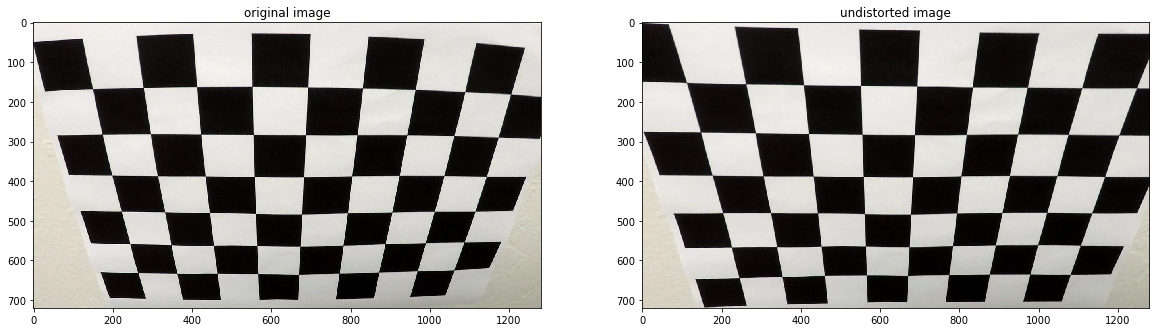

In [7]:
# Visualize results of distortion correction
plt.figure(figsize=(20, 20))
plt.figure(1)
plt.subplot(121) #nuw_rows, num_cols, fignum
plt.imshow(test_img)
plt.title("original image")

plt.subplot(122)
plt.imshow(test_img_udst)
plt.title("undistorted image")
plt.show()

## Color/gradient threshold

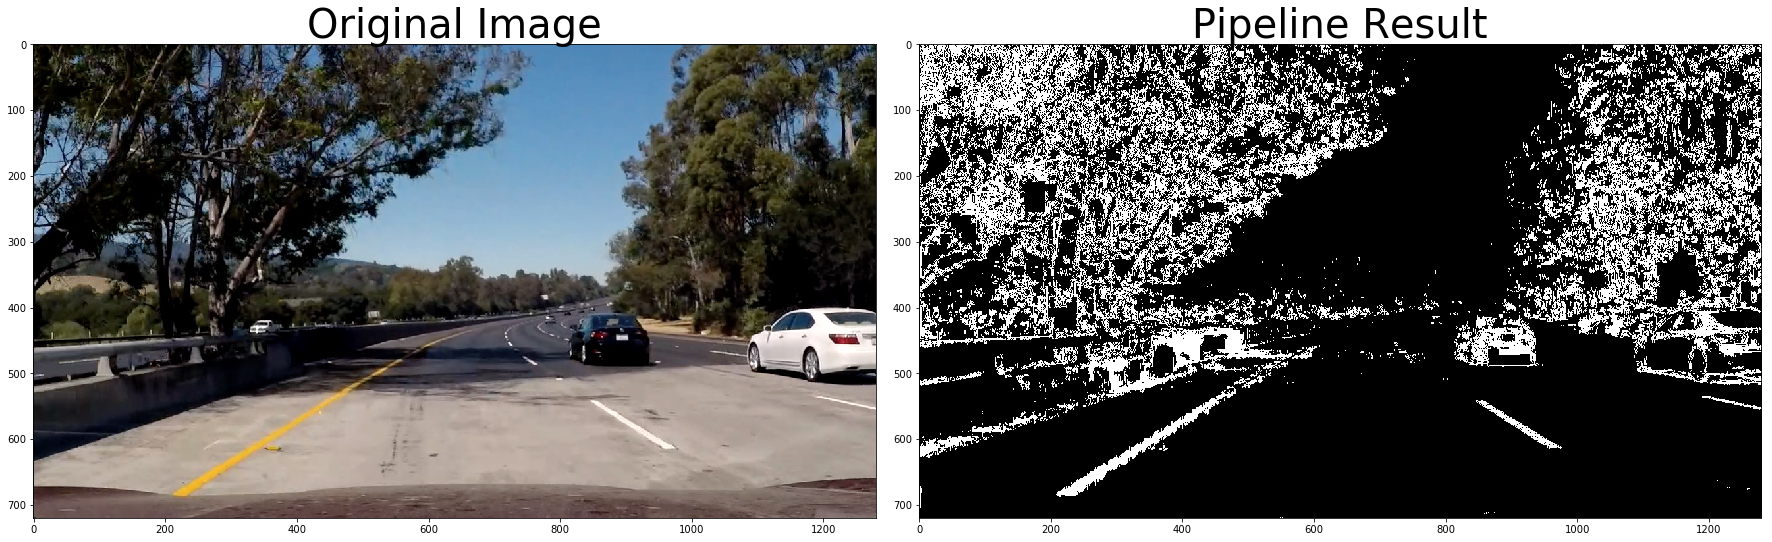

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('test_images/test5.jpg')

# Edit this function to create your own pipeline.
def threshold(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return combined_binary






In [ ]:
# evaluate possibilites
stepsize = 30
s_thresh_1 = list(range(0, 255, stepsize))
s_thresh_2 = list(range(0, 255, stepsize))
sx_thresh_1 = list(range(0, 255, stepsize))
sx_thresh_2 = list(range(0, 255, stepsize))
for s1 in s_thresh_1:
    for s2 in s_thresh_2:
        for sx1 in sx_thresh_1:
            for sx2 in sx_thresh_2:
                if sx2 <= sx1 or s2 <= s1:
                    continue
                
                print("trying out s_thresh=({},{}), ss_thresh=({},{})".format(s1, s2, sx1, sx2))
                
                result = pipeline(image, s_thresh=(s1, s2), sx_thresh=(sx1, sx2))
                
                plt.imshow(result, cmap='gray')
                plt.title("s_threshold=({}/{}), sx_threshold=({}/{})".format(s1, s2, sx1, sx2))
                plt.savefig("eval/{}-{}_{}-{}.png".format(s1, s2, sx1, sx2))
                
                if False:
                    # Plot the result
                    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
                    f.tight_layout()
                
                    ax1.imshow(image)
                    ax1.set_title('Original Image', fontsize=40)

                    ax2.imshow(result, cmap='gray')
                    ax2.set_title('Pipeline Result', fontsize=40)
                    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
                    plt.show()

trying out s_thresh=(0,30), ss_thresh=(0,30)
trying out s_thresh=(0,30), ss_thresh=(0,60)
trying out s_thresh=(0,30), ss_thresh=(0,90)
trying out s_thresh=(0,30), ss_thresh=(0,120)
trying out s_thresh=(0,30), ss_thresh=(0,150)
trying out s_thresh=(0,30), ss_thresh=(0,180)
trying out s_thresh=(0,30), ss_thresh=(0,210)
trying out s_thresh=(0,30), ss_thresh=(0,240)
trying out s_thresh=(0,30), ss_thresh=(30,60)
trying out s_thresh=(0,30), ss_thresh=(30,90)
trying out s_thresh=(0,30), ss_thresh=(30,120)
trying out s_thresh=(0,30), ss_thresh=(30,150)
trying out s_thresh=(0,30), ss_thresh=(30,180)
trying out s_thresh=(0,30), ss_thresh=(30,210)
trying out s_thresh=(0,30), ss_thresh=(30,240)
trying out s_thresh=(0,30), ss_thresh=(60,90)
trying out s_thresh=(0,30), ss_thresh=(60,120)
trying out s_thresh=(0,30), ss_thresh=(60,150)
trying out s_thresh=(0,30), ss_thresh=(60,180)
trying out s_thresh=(0,30), ss_thresh=(60,210)
trying out s_thresh=(0,30), ss_thresh=(60,240)
trying out s_thresh=(0,30),

trying out s_thresh=(0,150), ss_thresh=(150,180)
trying out s_thresh=(0,150), ss_thresh=(150,210)
trying out s_thresh=(0,150), ss_thresh=(150,240)
trying out s_thresh=(0,150), ss_thresh=(180,210)
trying out s_thresh=(0,150), ss_thresh=(180,240)
trying out s_thresh=(0,150), ss_thresh=(210,240)
trying out s_thresh=(0,180), ss_thresh=(0,30)
trying out s_thresh=(0,180), ss_thresh=(0,60)
trying out s_thresh=(0,180), ss_thresh=(0,90)
trying out s_thresh=(0,180), ss_thresh=(0,120)
trying out s_thresh=(0,180), ss_thresh=(0,150)
trying out s_thresh=(0,180), ss_thresh=(0,180)
trying out s_thresh=(0,180), ss_thresh=(0,210)
trying out s_thresh=(0,180), ss_thresh=(0,240)
trying out s_thresh=(0,180), ss_thresh=(30,60)
trying out s_thresh=(0,180), ss_thresh=(30,90)
trying out s_thresh=(0,180), ss_thresh=(30,120)
trying out s_thresh=(0,180), ss_thresh=(30,150)
trying out s_thresh=(0,180), ss_thresh=(30,180)
trying out s_thresh=(0,180), ss_thresh=(30,210)
trying out s_thresh=(0,180), ss_thresh=(30,240)

trying out s_thresh=(30,90), ss_thresh=(90,150)
trying out s_thresh=(30,90), ss_thresh=(90,180)
trying out s_thresh=(30,90), ss_thresh=(90,210)
trying out s_thresh=(30,90), ss_thresh=(90,240)
trying out s_thresh=(30,90), ss_thresh=(120,150)
trying out s_thresh=(30,90), ss_thresh=(120,180)
trying out s_thresh=(30,90), ss_thresh=(120,210)
trying out s_thresh=(30,90), ss_thresh=(120,240)
trying out s_thresh=(30,90), ss_thresh=(150,180)
trying out s_thresh=(30,90), ss_thresh=(150,210)
trying out s_thresh=(30,90), ss_thresh=(150,240)
trying out s_thresh=(30,90), ss_thresh=(180,210)
trying out s_thresh=(30,90), ss_thresh=(180,240)
trying out s_thresh=(30,90), ss_thresh=(210,240)
trying out s_thresh=(30,120), ss_thresh=(0,30)
trying out s_thresh=(30,120), ss_thresh=(0,60)
trying out s_thresh=(30,120), ss_thresh=(0,90)
trying out s_thresh=(30,120), ss_thresh=(0,120)
trying out s_thresh=(30,120), ss_thresh=(0,150)
trying out s_thresh=(30,120), ss_thresh=(0,180)
trying out s_thresh=(30,120), ss_

trying out s_thresh=(30,240), ss_thresh=(30,120)
trying out s_thresh=(30,240), ss_thresh=(30,150)
trying out s_thresh=(30,240), ss_thresh=(30,180)
trying out s_thresh=(30,240), ss_thresh=(30,210)
trying out s_thresh=(30,240), ss_thresh=(30,240)
trying out s_thresh=(30,240), ss_thresh=(60,90)
trying out s_thresh=(30,240), ss_thresh=(60,120)
trying out s_thresh=(30,240), ss_thresh=(60,150)
trying out s_thresh=(30,240), ss_thresh=(60,180)
trying out s_thresh=(30,240), ss_thresh=(60,210)
trying out s_thresh=(30,240), ss_thresh=(60,240)
trying out s_thresh=(30,240), ss_thresh=(90,120)
trying out s_thresh=(30,240), ss_thresh=(90,150)
trying out s_thresh=(30,240), ss_thresh=(90,180)
trying out s_thresh=(30,240), ss_thresh=(90,210)
trying out s_thresh=(30,240), ss_thresh=(90,240)
trying out s_thresh=(30,240), ss_thresh=(120,150)
trying out s_thresh=(30,240), ss_thresh=(120,180)
trying out s_thresh=(30,240), ss_thresh=(120,210)
trying out s_thresh=(30,240), ss_thresh=(120,240)
trying out s_thre

trying out s_thresh=(60,180), ss_thresh=(210,240)
trying out s_thresh=(60,210), ss_thresh=(0,30)
trying out s_thresh=(60,210), ss_thresh=(0,60)
trying out s_thresh=(60,210), ss_thresh=(0,90)
trying out s_thresh=(60,210), ss_thresh=(0,120)
trying out s_thresh=(60,210), ss_thresh=(0,150)
trying out s_thresh=(60,210), ss_thresh=(0,180)
trying out s_thresh=(60,210), ss_thresh=(0,210)
trying out s_thresh=(60,210), ss_thresh=(0,240)
trying out s_thresh=(60,210), ss_thresh=(30,60)
trying out s_thresh=(60,210), ss_thresh=(30,90)
trying out s_thresh=(60,210), ss_thresh=(30,120)
trying out s_thresh=(60,210), ss_thresh=(30,150)
trying out s_thresh=(60,210), ss_thresh=(30,180)
trying out s_thresh=(60,210), ss_thresh=(30,210)
trying out s_thresh=(60,210), ss_thresh=(30,240)
trying out s_thresh=(60,210), ss_thresh=(60,90)
trying out s_thresh=(60,210), ss_thresh=(60,120)
trying out s_thresh=(60,210), ss_thresh=(60,150)
trying out s_thresh=(60,210), ss_thresh=(60,180)
trying out s_thresh=(60,210), ss_

trying out s_thresh=(90,180), ss_thresh=(90,180)
trying out s_thresh=(90,180), ss_thresh=(90,210)
trying out s_thresh=(90,180), ss_thresh=(90,240)
trying out s_thresh=(90,180), ss_thresh=(120,150)
trying out s_thresh=(90,180), ss_thresh=(120,180)
trying out s_thresh=(90,180), ss_thresh=(120,210)
trying out s_thresh=(90,180), ss_thresh=(120,240)
trying out s_thresh=(90,180), ss_thresh=(150,180)
trying out s_thresh=(90,180), ss_thresh=(150,210)
trying out s_thresh=(90,180), ss_thresh=(150,240)
trying out s_thresh=(90,180), ss_thresh=(180,210)
trying out s_thresh=(90,180), ss_thresh=(180,240)
trying out s_thresh=(90,180), ss_thresh=(210,240)
trying out s_thresh=(90,210), ss_thresh=(0,30)
trying out s_thresh=(90,210), ss_thresh=(0,60)
trying out s_thresh=(90,210), ss_thresh=(0,90)
trying out s_thresh=(90,210), ss_thresh=(0,120)
trying out s_thresh=(90,210), ss_thresh=(0,150)
trying out s_thresh=(90,210), ss_thresh=(0,180)
trying out s_thresh=(90,210), ss_thresh=(0,210)
trying out s_thresh=

trying out s_thresh=(120,210), ss_thresh=(30,90)
trying out s_thresh=(120,210), ss_thresh=(30,120)
trying out s_thresh=(120,210), ss_thresh=(30,150)
trying out s_thresh=(120,210), ss_thresh=(30,180)
trying out s_thresh=(120,210), ss_thresh=(30,210)
trying out s_thresh=(120,210), ss_thresh=(30,240)
trying out s_thresh=(120,210), ss_thresh=(60,90)
trying out s_thresh=(120,210), ss_thresh=(60,120)
trying out s_thresh=(120,210), ss_thresh=(60,150)
trying out s_thresh=(120,210), ss_thresh=(60,180)
trying out s_thresh=(120,210), ss_thresh=(60,210)
trying out s_thresh=(120,210), ss_thresh=(60,240)
trying out s_thresh=(120,210), ss_thresh=(90,120)
trying out s_thresh=(120,210), ss_thresh=(90,150)
trying out s_thresh=(120,210), ss_thresh=(90,180)
trying out s_thresh=(120,210), ss_thresh=(90,210)
trying out s_thresh=(120,210), ss_thresh=(90,240)
trying out s_thresh=(120,210), ss_thresh=(120,150)
trying out s_thresh=(120,210), ss_thresh=(120,180)
trying out s_thresh=(120,210), ss_thresh=(120,210)

## Perspective transform

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def warp(img, 
         src = [[850, 320], [865, 450], [533, 350], [535, 210]], 
         dst = [[870, 240], [870, 370], [520, 370], [520, 240]]):
    
    img_size = (img.shape[1], img.shape[0])

    src = np.float32(src)

    dst = np.float32(dst)

    # compute the transformation
    M = cv2.getPerspectiveTransform(src, dst)

    # Could compute the inverse to reverse the transformation
    Minv = cv2.getPerspectiveTransform(dst, src)

    # get warped image
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped

# Read and dispaly the original image
img = mpimg.imread("test_images/test5.jpg")
plt.imshow(img)
plt.plot(x, y, ".") # display dot

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result, cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()